In [1]:
import scipy.odr as odr

In [2]:
from pyMez import *

Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 0.422 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.782 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
It took 14.943 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.015 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.452 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.068 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
It took 2.381 s to import Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
It took 0.021 s to import Code.InstrumentControl.Instruments
Importing Code.Utils.Names
It took 0.019 s to import Code.Utils.Names
It took 19.104 s to import all of the active modules


In [6]:
scope_data_10GHZ=AsciiDataTable(r"C:\Share\AWG_Phase_Calibration\AWG_Full_Calibration_20181123\Schroeder_Phase\Phase_Calibration_10\11_Tones_10000KHz_Spacing\Calibration_Phase_Reference_Scope_Measurement.txt")

In [7]:
scope_data_10GHZ.column_names

['Time', 'CHAN1', 'CHAN2', 'CHAN3', 'CHAN4']

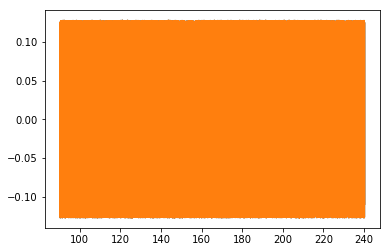

In [9]:
plt.plot(scope_data_10GHZ["Time"],scope_data_10GHZ["CHAN3"])
plt.show()

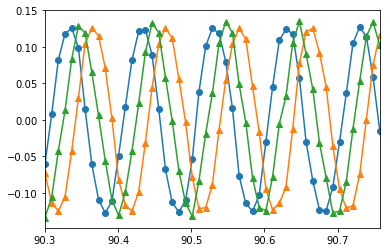

In [20]:
start=0
stop=50
plt.plot(scope_data_10GHZ["Time"],scope_data_10GHZ["CHAN3"],"o-")
plt.plot(scope_data_10GHZ["Time"],scope_data_10GHZ["CHAN4"],"^-")
plt.plot(scope_data_10GHZ["Time"],np.array(scope_data_10GHZ["CHAN3"])+np.array(scope_data_10GHZ["CHAN4"]),"^-")
plt.xlim([scope_data_10GHZ["Time"][start],scope_data_10GHZ["Time"][stop]])
plt.show()

In [15]:
from pyMez.Code.Analysis.Fitting import *

In [18]:
# Constructing the equation string to pass to FunctionalModel
number_terms=2
frequency_list=[10*10**9,10*10**9]
fit_function=""
for i in range(number_terms):
    if i<number_terms-1:
        fit_function=fit_function+"A_{0}*cos(2*pi*{1}*t+phi_{0})+".format(i+1,frequency_list[i])
    else:
        fit_function=fit_function+"A_{0}*cos(2*pi*{1}*t+phi_{0})".format(i+1,frequency_list[i])
# Construct the parameter List
parameter_list=["A_{0}".format(i+1) for i in range(number_terms)]+["phi_{0}".format(i+1) for i in range(number_terms)]

# Here are the actual functions
tbc_trial_fit=FunctionalModel(parameters=parameter_list,variables="t",equation=fit_function)

In [19]:
print(tbc_trial_fit)

A_1*cos(phi_1 + 20000000000*pi*t) + A_2*cos(phi_2 + 20000000000*pi*t)


In [24]:
x_data=np.array(scope_data_10GHZ["Time"])
y_data=np.array(scope_data_10GHZ["CHAN3"])-np.array(scope_data_10GHZ["CHAN4"])
tbc_trial_fit.fit_data(x_data,y_data)

In [25]:
print(tbc_trial_fit)

9.80903888840867e-5*cos(20000000000*pi*t)


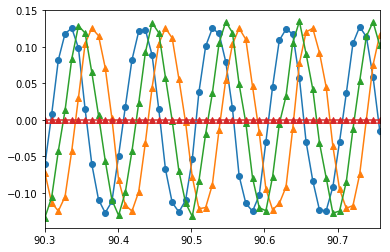

In [26]:
start=0
stop=50
plt.plot(scope_data_10GHZ["Time"],scope_data_10GHZ["CHAN3"],"o-")
plt.plot(scope_data_10GHZ["Time"],scope_data_10GHZ["CHAN4"],"^-")
plt.plot(scope_data_10GHZ["Time"],np.array(scope_data_10GHZ["CHAN3"])+np.array(scope_data_10GHZ["CHAN4"]),"^-")
plt.plot(scope_data_10GHZ["Time"],tbc_trial_fit(x_data),"^-")
plt.xlim([scope_data_10GHZ["Time"][start],scope_data_10GHZ["Time"][stop]])
plt.show()

In [27]:
tbc_trial_fit.parameter_values

{'A_1': 0.5524839666743209,
 'A_2': -0.5523858762854368,
 'phi_1': 0.0,
 'phi_2': 0.0}

In [52]:
tbc_trial_fit_2=FunctionalModel(parameters=["A","B","phi"],variables="t",
                                equation="A*sin(2*pi*{0}*t+phi)".format(10*10**9))
print(tbc_trial_fit_2)

A*sin(phi + 20000000000*pi*t)


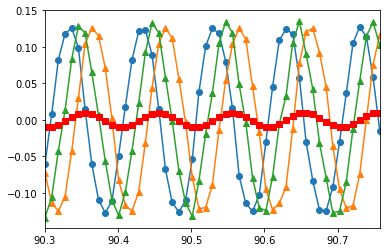

In [53]:
x_data=np.array(scope_data_10GHZ["Time"])*10**-9
y_data=np.array(scope_data_10GHZ["CHAN3"])+np.array(scope_data_10GHZ["CHAN4"])
tbc_trial_fit_2.fit_data(x_data,y_data)
start=0
stop=50
plt.close()
plt.plot(scope_data_10GHZ["Time"],scope_data_10GHZ["CHAN3"],"o-")
plt.plot(scope_data_10GHZ["Time"],scope_data_10GHZ["CHAN4"],"^-")
plt.plot(scope_data_10GHZ["Time"],np.array(scope_data_10GHZ["CHAN3"])+np.array(scope_data_10GHZ["CHAN4"]),"^-")
plt.plot(scope_data_10GHZ["Time"],tbc_trial_fit_2(x_data),"rs")
plt.xlim([scope_data_10GHZ["Time"][start],scope_data_10GHZ["Time"][stop]])
plt.show()

In [54]:
tbc_trial_fit_2.parameter_values

{'A': -0.009952263556639166, 'B': 0.0, 'phi': 1.2175051457234933}

In [59]:
np.sqrt(np.sum(np.array(scope_data_10GHZ["CHAN3"])**2))

11.759162637120127